In [1]:
import copy
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Record():
    def __init__(self,data,data_type):
        self.data = data
        self.data_type = data_type
        self.X, self.Y = None, None
        if data_type == 'business':
            self.business_ids = self.data['business_id'].values
        elif data_type == 'inspection':
            self.names = self.data['Location Name'].values
        elif data_type == 'review':
            self.business_ids = self.data['business_id'].values
        else:
            raise ValueError("Specify data type in the 2nd argument: \
                             'business', 'inspection' or 'review'")
    def get_data(self):
        return self.data
    # returns the Yelp business id (available for review and business)
    def get_business_ids(self):
        return self.business_ids
    # returns business name (available for inspection)
    def get_restaurant_names(self):
        return self.names

In [2]:
csv1 = pd.read_csv('Vegas_Inspection_cleansed.csv')
d1 = csv1.copy()
inspection = Record(d1,'inspection')

csv2 = pd.read_csv('businessesVegas.csv')
d2 = csv2.copy()
business = Record(d2,'business')

csv3 = pd.read_csv('Vegas_Reviews.csv')
d3 = csv3.copy()
review = Record(d3,'review')

In [4]:
def summary_inspection(inspection):
    inspection = inspection.get_data()
    print("Number of unique inspection permit ID:", len(np.unique(inspection['Permit Number'])))
    print("\nColumns in Inspection:", inspection.columns)
    print("\nShape:",inspection.shape)
    return inspection.head()

summary_inspection(inspection)

Number of unique inspection permit ID: 17209

Columns in Inspection: Index(['Permit Number', 'Restaurant Name', 'Location Name', 'Category Name',
       'Address', 'Zip', 'Current Demerits', 'Current Grade',
       'Inspection Date', 'Inspection Time', 'Employee ID', 'Inspection Type',
       'Inspection Demerits', 'Inspection Grade', 'Permit Status',
       'Inspection Result', 'Violations'],
      dtype='object')

Shape: (122630, 17)


,Permit Number,Restaurant Name,Location Name,Category Name,Address,Zip,Current Demerits,Current Grade,Inspection Date,Inspection Time,Employee ID,Inspection Type,Inspection Demerits,Inspection Grade,Permit Status,Inspection Result,Violations
0,PR0009484,Venetian Main Kitchen Warewash,Venetian Hotel & Casino,Special Kitchen,3355 S Las Vegas Blvd,89109.0,0,A,10/24/2017 12:00:00 AM,10/24/2017 01:30:00 PM,EE7001166,Routine Inspection,0,A,A,'A' Grade,NaN
1,PR0115843,Lee's Liquor - Sampling,Lee's Liquor,Grocery Store Sampling,6690 N Durango,89149.0,0,A,01/02/2018 12:00:00 AM,01/02/2018 10:25:00 AM,EE7000860,Routine Inspection,0,A,A,'A' Grade,NaN
2,PR0003177,7-eleven #32224 - Snack Bar,7-eleven Convenience Store #32224,Snack Bar,5576 Boulder Hwy,89122.0,3,A,02/09/2017 12:00:00 AM,02/09/2017 10:00:00 AM,EE7000559,Routine Inspection,3,A,A,'A' Grade,"215,2927"
3,PR0113989,99 Ranch Market Seafood,99 Ranch Market,Meat;Poultry;Seafood,3778 S Maryland,89119.0,0,A,02/15/2018 12:00:00 AM,02/15/2018 12:20:00 PM,EE7001184,Routine Inspection,0,A,A,'A' Grade,2930
4,PR0018032,South Point Buffet North,South Point Hotel & Casino,Buffet,9777 Las Vegas Blvd,89183.0,3,A,02/15/2018 12:00:00 AM,02/15/2018 12:00:00 PM,EE7001088,Routine Inspection,3,A,A,'A' Grade,"215,2928,2930"


In [31]:
def summary_business(business):
    business = business.get_data()
    print("\nColumns in Business:", business.columns)
    print("\nShape:",business.shape)
    return business.head()
summary_business(business)


Columns in Business: Index(['Unnamed: 0', 'business_id', 'name', 'neighborhood', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'categories'],
      dtype='object')

Shape: (28211, 14)


,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128.0,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...
1,7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128.0,36.197484,-115.249660,1.5,9,1,Shopping;Sporting Goods
2,26,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119.0,36.085051,-115.119421,4.5,23,1,Shopping;Jewelry;Watch Repair;Local Services
3,41,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113.0,36.056382,-115.269332,4.5,20,1,Home Services;Lighting Fixtures & Equipment;Lo...
4,48,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122.0,36.105196,-115.056880,3.5,25,1,Nurseries & Gardening;Home & Garden;Shopping


In [32]:
def summary_review(review):
    review = review.get_data()
    print("\nColumns in Review:", review.columns)
    print("\nShape:", review.shape)
    return review.head()
summary_review(review)


Columns in Review: Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')

Shape: (1643604, 9)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,8QWPlVQ6D-OExqXoaD2Z1g,0,2014-09-24,0.0,HRPm3vEZ_F-33TYVT7Pebw,5.0,Cycle Pub Las Vegas was a blast! Got a groupon...,1.0,_4iMDXbXZ1p1ONG297YEAQ
1,pLZ9oZM8c6MNbRlg06lBPg,0,2016-08-03,0.0,JN0tmjiksWfr4i2NIFuPXw,1.0,THEY SELL WRECKED VEHICLES! \nI purchased a 20...,0.0,r9HwWzRRd0EvcwnDX9TLTg
2,6Q7-wkCPc1KF75jZLOTcMw,1,2012-08-22,1.0,PRj0OFgJjN5ljpeDskP_Tw,2.0,"Okay, so from what I am reading, a lot of othe...",3.0,nOTl4aPC4tKHK35T3bNauQ
3,9Jc3W0aR9Xf2gcHI0rEXsw,0,2012-08-23,1.0,QgSf2JvYz-M4PU2yuJjxNQ,1.0,"After being scared away from Rock & Rita's, we...",0.0,nOTl4aPC4tKHK35T3bNauQ
4,xVEtGucSRLk5pxxN0t4i6g,0,2012-08-23,0.0,gN6GARS_BRr5UX2D3WAH0w,5.0,We got recommendations for this place from my ...,0.0,nOTl4aPC4tKHK35T3bNauQ


In [33]:
# Convert Inspection time to datetime object
def convert_datetime(data):
    data = data.get_data()
    data['Inspection Time'] = pd.to_datetime(data['Inspection Time'], infer_datetime_format=True)
    return data['Inspection Time'].head()
convert_datetime(inspection)

0   2017-10-24 13:30:00
1   2018-01-02 10:25:00
2   2017-02-09 10:00:00
3   2018-02-15 12:20:00
4   2018-02-15 12:00:00
Name: Inspection Time, dtype: datetime64[ns]

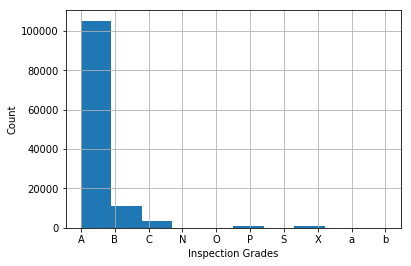

0.8572616814808774

In [10]:
# Histogram of health inspection grades
def grade_dist(data):
    data = data.get_data()
    
    # The percentage of grade-A businesses in Las Vegas
    def numeric():
        grade_A_ct = len(data.loc[data['Inspection Grade'] == 'A'])
        return grade_A_ct / len(data)

    grade = data['Inspection Grade'].dropna(axis=0,how='any')
    plt.hist(grade)
    plt.grid(True)
    plt.xlabel('Inspection Grades')
    plt.ylabel('Count')
    plt.show()
    
    return numeric()
grade_dist(inspection)

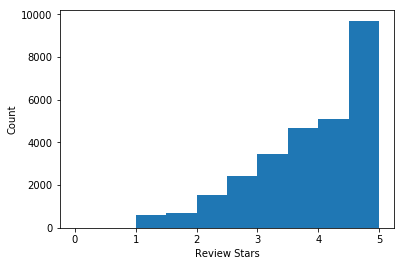

(count    28211.000000
 mean         3.698433
 std          1.035290
 min          1.000000
 25%          3.000000
 50%          4.000000
 75%          4.500000
 max          5.000000
 Name: stars, dtype: float64, count    28211.000000
 mean        58.258764
 std        200.086495
 min          3.000000
 25%          5.000000
 50%         12.000000
 75%         37.000000
 max       7361.000000
 Name: review_count, dtype: float64)

In [11]:
# Histogram of restaurant review stars
def review_dist(business):
    business = business.get_data()
    stars = business['stars'].dropna(axis=0,how='any')
    plt.hist(stars,bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
    plt.xlabel('Review Stars')
    plt.ylabel('Count')
    plt.show()
    return business['stars'].describe(), business['review_count'].describe()
review_dist(business)

In [12]:
# Histogram of restaurant demerits (inspection)
def demerit_dist(inspection, business):
    inspection = inspection.get_data()
    business = business.get_data()
    
    # scatter plot of demerit & review score
    review_stars = business['stars']
    
    
    return inspection['Inspection Demerits'].describe()
demerit_dist(inspection, business)

count    122630.000000
mean          5.870064
std           6.682492
min           0.000000
25%           0.000000
50%           4.000000
75%           8.000000
max         250.000000
Name: Inspection Demerits, dtype: float64

In [ ]:
"""
## Code used to extracted relevant rows and cols from Restaurant_Inspections.csv
## to generate Vegas_Inspection.csv
def cleanse(orig_data):
    vegas = ['Las Vegas', 'Las VegS', 'Las VeTGAS', 'Las VGAS']
    info = orig_data.loc[orig_data['City'].isin(vegas)]
    fields = ['Permit Number', 'Restaurant Name','Location Name',
              'Category Name','Address','Zip','Current Demerits','Current Grade',
             'Inspection Date','Inspection Time','Employee ID',
             'Inspection Type','Inspection Demerits','Inspection Grade',
             'Permit Status','Inspection Result','Violations']
    info.to_csv('Vegas_Inspection.csv',columns=fields,index=False)
    return 0
cleanse(orig_data)
"""

In [4]:
"""
## Code used to extract relevant reviews in review.json based on business ids 
## from business.csv
def process_reviews(business):    
    business_data = copy.deepcopy(business)
    vegas_business_id = business_data.get_business_ids()
    with open('review.json') as srcfile:
        review_data = srcfile.readlines()
        review_data = list(map(json.loads,review_data))
    d3 = pd.DataFrame(review_data)
    vegas_reviews = d3.loc[d3['business_id'].isin(vegas_business_id)]
    vegas_reviews.to_csv('Vegas_Reviews.csv',index=False) 
    return 0
process_reviews(business)
"""

0